In [1]:
import oommfc as mc
import discretisedfield as df
import micromagneticmodel as mm

region = df.Region(p1=(-50e-9, -50e-9, 0), p2=(50e-9, 50e-9, 10e-9))
mesh = df.Mesh(region=region, cell=(5e-9, 5e-9, 5e-9))

system = mm.System(name='hysteresis')


def Hval(point):
    x, y, z = point
    
    if x < 0:
        return (0, 0, 1e6)
    else:
        return (0, 0, 1e6)

H = df.Field(mesh, dim=3, value=Hval)

system.energy = mm.Exchange(A=1e-12) + mm.Demag() + mm.UniaxialAnisotropy(K=1e3, u=(0, 0, 1)) + \
   mm.DMI(D=1e-4, crystalclass='Cnv') + mm.Zeeman(H=(0, 0, 1e2)) + mm.CubicAnisotropy(K=1e2, u1=(0, 0, 1), u2=(0, 1, 0))
Ms = 1.1e6

# create system with above geometry and initial magnetisation
system.m = df.Field(mesh, dim=3, value=(0, 0, 1), norm=Ms)

Running OOMMF (ExeOOMMFRunner) [2020/12/31 20:45]... (1.5 s)


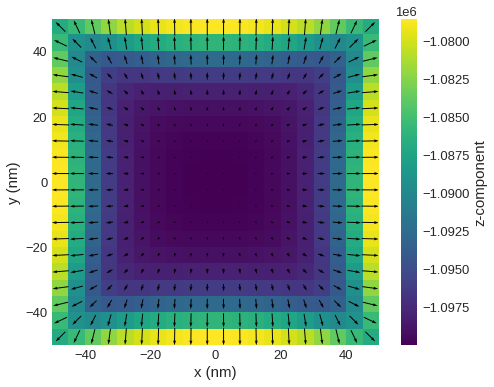

In [2]:
Hmin = (0, 0, -1e6)
Hmax = (0, 0, 1e6)
n = 10

# minimize the energy
hd = mc.HysteresisDriver()
hd.drive(system, Hmin=Hmin, Hmax=Hmax, n=n)

# Plot relaxed configuration: vectors in z-plane
system.m.plane('z').mpl()

In [3]:
system.table

    max_mxHxm             E       delta_E  bracket_count  line_min_count  \
0    0.063313 -7.751637e-17 -2.465190e-31           67.0            15.0   
1    0.090869 -4.742082e-17 -5.361789e-31          118.0            56.0   
2    0.099535 -2.452288e-17 -3.081488e-32          207.0           113.0   
3    0.098373 -8.180873e-18 -2.465190e-32          241.0           136.0   
4    0.072724  1.212661e-19 -2.684265e-31          272.0           158.0   
5    0.072469  1.174823e-19 -1.099465e-31          308.0           180.0   
6    0.083980 -8.192009e-18 -3.081488e-33          339.0           202.0   
7    0.093614 -2.454109e-17 -1.848893e-32          372.0           226.0   
8    0.070286 -4.831024e-17 -2.341931e-31          409.0           254.0   
9    0.098064 -7.754381e-17 -9.860761e-32          457.0           289.0   
10   0.097908 -4.831024e-17 -4.314083e-32          541.0           356.0   
11   0.097815 -2.454109e-17 -3.420452e-31          584.0           384.0   
12   0.09869

In [4]:
system.m.orientation((-20e-9, 0, 0))

(-0.042543982254741035, 0.0027369419172555203, -0.9990908460810008)

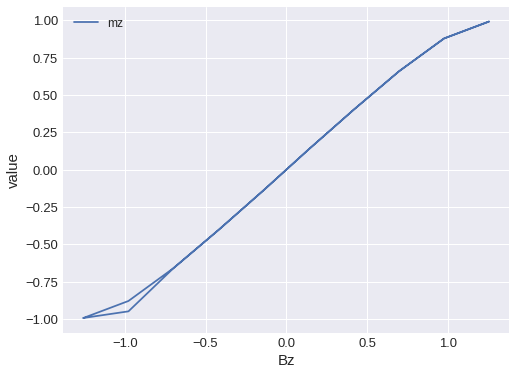

In [14]:
system.table.mpl(x='Bz', y=['mz'])

In [15]:
system.table.units

{'max_mxHxm': 'A/m',
 'E': 'J',
 'delta_E': 'J',
 'bracket_count': '',
 'line_min_count': '',
 'conjugate_cycle_count': '',
 'cycle_count': '',
 'cycle_sub_count': '',
 'energy_calc_count': '',
 'E_exchange': 'J',
 'max_spin_ang_exchange': 'deg',
 'stage_max_spin_ang_exchange': 'deg',
 'run_max_spin_ang_exchange': 'deg',
 'E_demag': 'J',
 'E_uniaxialanisotropy': 'J',
 'E_dmi': 'J',
 'E_zeeman': 'J',
 'E_cubicanisotropy': 'J',
 'B': 'mT',
 'Bx': 'mT',
 'By': 'mT',
 'Bz': 'mT',
 'iteration': '',
 'stage_iteration': '',
 'stage': '',
 'mx': '',
 'my': '',
 'mz': ''}

In [ ]:
system.table

In [ ]:
import micromagneticmodel as mm

In [ ]:
mm.__version__

In [ ]:
a = ['r1', 'r2']
f'{{main_atlas {" ".join(a)}}}'